#Getting data from Label Studio

**First we install the necessary libraries**

In [ ]:
pip install label_studio


     |████████████████████████████████| 42.8 MB 1.5 MB/s 
     |████████████████████████████████| 509 kB 50.6 MB/s 
     |████████████████████████████████| 130 kB 59.3 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 1.4 MB 44.8 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 346 kB 52.3 MB/s 
     |████████████████████████████████| 68 kB 5.3 MB/s 
     |████████████████████████████████| 7.8 MB 27.9 MB/s 
     |████████████████████████████████| 222 kB 61.5 MB/s 
     |████████████████████████████████| 596 kB 45.8 MB/s 
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 40.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 3.4 MB 46.4 MB/s 
     |████████████████████████████████| 144 kB 69.7 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████

In [ ]:
pip install label_studio_sdk


In [ ]:
pip install nltk


In [ ]:
pip install tqdm


**Now we use the account specific API KEY and connect to Label studio to get the annotated data as a list.**

In [ ]:
from label_studio_sdk import Client
from label_studio_sdk import project
from label_studio_sdk import project
import pandas as pd


LABEL_STUDIO_URL = 'http://132.231.59.226:8080' #this address needs to be the same as the address the label-studio is hosted on.
API_KEY = '6700ab4e6a108576cb51bf47663916261e8200fe' #please add your personal API_Key here to get your API_Key follow the Pictures below

ls = Client(url=LABEL_STUDIO_URL, api_key=API_KEY)
ls.check_connection()
pro = project.Project.get_from_id(ls,"1")
tasks = project.Project.get_labeled_tasks(pro)

**Now we convert the data into a CSV containing the annotated data.**

In [ ]:
def from_label_studio_to_dataframe( LABEL_STUDIO_URL="",
                                    API_KEY=""):
    '''
    Goals:
        - Load the labeled data from Label Studio 
            (or from a raw_data dictionary saved locally as a pickle file), clean it, and save it into a panda data frame 
    Attributes:
        - LABEL_STUDIO_URL (url as string): the url for the label studio project you want to get your data from
        - API_KEY (string): your Label Studio API_KEY
    Returns:
        - df (pandas DataFrame): The labeled data as a pandas DataFrame
    '''

    
    ls = Client(url=LABEL_STUDIO_URL, api_key=API_KEY)
    ls.check_connection()
    pro = project.Project.get_from_id(ls, "1")
    raw_data = project.Project.get_labeled_tasks(pro)
        

    df = pd.DataFrame(columns=["text", "category", "stage", "level"])

    question_tags = [
        "Question_1_Company_specific", "Question_1_Market_related",
        "Question_2_specific", "Question_2_open", 
        "Question_3_attack", "Question_3_support", "Question_3_neutral"
    ]

    answer_tags = [
        "Answer_1_specific", "Answer_1_avoid_excuse", 
        "Answer_2_negative", "Answer_2_positive", 
        "Answer_3_blame", "Answer_3_no_blame"
    ]

    tag2val = {
        "Question_1_Company_specific": 0,
        "Question_1_Market_related": 1,
        "Question_2_specific": 0,
        "Question_2_open": 1,
        "Question_3_attack": 2,
        "Question_3_support": 0,
        "Question_3_neutral": 1,
        "Answer_1_specific": 0,
        "Answer_1_avoid_excuse": 1,
        "Answer_2_negative": 0,
        "Answer_2_positive": 1,
        "Answer_3_blame": 0,
        "Answer_3_no_blame": 1
    }


    for task in tqdm.tqdm(raw_data):
        annotations = task["annotations"][0]["result"]

        for ann in annotations:
            text = ann["value"]["text"]
            label = ann["value"]["labels"][0]
            

            # Ignore any odservation that does not have any of the question and answer stages
            # (ex: an observation that only labels the question QID_13)
            if len(label) < 7:
                continue

            # Get the category "Answer" or "Question" from the label
            category = "Answer" if "Answer" in label else "Question"
            # Get the stage number
            stage = int(label.split("_")[1])
            # Get the level
            level = tag2val[label]
            # Add the observation to the dataframe
            df = df.append(
                {
                    "text": text,
                    "category": category,
                    "stage": stage,
                    "level": level
                },
                ignore_index=True)    

    return df

In [ ]:
from label_studio_sdk import Client
from label_studio_sdk import project
from label_studio_sdk import project
import pandas as pd


LABEL_STUDIO_URL = 'http://132.231.59.226:8080' #this address needs to be the same as the address the label-studio is hosted on.
API_KEY = '6700ab4e6a108576cb51bf47663916261e8200fe' #please add your personal API_Key here to get your API_Key follow the Pictures below

data = from_label_studio_to_dataframe( LABEL_STUDIO_URL = LABEL_STUDIO_URL , API_KEY= API_KEY)
data
data.to_csv('data.csv')

100%|███████████████████████████████████████████| 72/72 [00:09<00:00,  7.42it/s]


**Importing the data in the CSV as a dataframe**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


,Unnamed: 0,text,category,stage,level
0,0,Good afternoon and thanks a lot for taking my...,Question,1,0
1,1,Good afternoon and thanks a lot for taking my ...,Question,2,0
2,2,Good afternoon and thanks a lot for taking my ...,Question,3,1
3,3,"No, I think that as it relates to the one, I t...",Answer,1,0
4,4,"No, I think that as it relates to the one, I ...",Answer,2,1
...,...,...,...,...,...
8467,8467,One of the areas obviously which has been a s...,Question,2,0
8468,8468,One of the areas obviously which has been a st...,Question,3,1
8469,8469,"Well, let's start with the first part of your ...",Answer,1,0
8470,8470,"Well, let's start with the first part of your ...",Answer,2,1


#Data Pre-Processing and Data Cleaning

**Before using the data for analysis or prediction, processing the data is important. To prepare the text data for the model building we perform text preprocessing . Here , for example we try to predict Question LABEL 1 ("Question_1_Company_specific": 0, "Question_1_Market_related": 1) for the text. So we remove the data that are Answers and get data specific to Question 1** 

In [ ]:
index= df[df["category"]=="Answer"].index
df.drop(index,inplace=True)
data= df[df["stage"]==1]
data.drop(columns=["category","stage","Unnamed: 0"],axis=1 ,inplace=True)
data.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1309, 2)

In [ ]:
data

,text,level
0,Good afternoon and thanks a lot for taking my...,0
6,"Okay, that's very helpful. And then on your gr...",0
12,"Hi Richard. So, on gross margin, it looked pre...",1
18,And the core-on-core was pretty normal for you...,0
24,Okay. And my follow-up is on the EBIT dollar ...,0
...,...,...
8445,Hi. This is Mark for Pat. Thank you so much fo...,0
8448,Yes. I'm just wondering if you could talk a li...,0
8454,"Hi, thank you. Congrats on the quarter. Just a...",0
8460,Thanks for squeezing me in guys. This question...,0


**Whenever we have textual data, we need to apply several pre-processing steps to the data to transform words into numerical features that work with machine learning algorithms.**

**We lowercase the text to reduce the size of the vocabulary of our text data.**

**We can either remove numbers or convert the numbers into their textual representations. We can use regular expressions to remove the numbers.**

**We remove punctuations so that we don’t have different forms of the same word. If we don’t remove the punctuation, then been. been, been! will be treated separately.**

**Stopwords are words that do not contribute to the meaning of a sentence. Hence, they can safely be removed without causing any change in the meaning of the sentence. The NLTK library has a set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.**

**Stemming is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes (-ed, -ize, -de, -s, etc.) are added. The stem of a word is created by removing the prefix or suffix of a word. Here we use the snowball stemmer. It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer.**

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
snowStem = nltk.stem.SnowballStemmer('english')
sw_nltk = stopwords.words('english')
sw_nltk.append('however')

def my_preprocessor(processed_data, remove_stopwords = False, stemming = False):
    # remove numbers 
    processed_data = re.sub(r'\d+', '', processed_data)
    # remove punctuation
    processed_data = processed_data.translate(str.maketrans('','', string.punctuation))
    # remove spaces
    processed_data = processed_data.strip()
    #upper to lower
    processed_data = processed_data.lower()
    
    if stemming:
      # stemming
      processed_data = snowStem.stem(processed_data)
    
    if remove_stopwords:
      # remove stop words
        processed_data = ' '.join([word for word in processed_data.split() if not(word in sw_nltk)])
        
    
    return processed_data

In [ ]:
data.loc[:, 'processed_data'] = [my_preprocessor(text, remove_stopwords = True) for text in data.text]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
corpus=[]
for text in data["text"]:
    corpus.append(my_preprocessor(text, remove_stopwords = True))

**Here we get the target variable level and the processed data is added to the data frame.**

In [ ]:
target=data['level']

In [ ]:
#reorder the text

data = data[['text','processed_data','level']]
data

,text,processed_data,level
0,Good afternoon and thanks a lot for taking my...,good afternoon thanks lot taking question you’...,0
6,"Okay, that's very helpful. And then on your gr...",okay thats helpful growth china surpass expect...,0
12,"Hi Richard. So, on gross margin, it looked pre...",hi richard gross margin looked pretty solid wa...,1
18,And the core-on-core was pretty normal for you...,coreoncore pretty normal well,0
24,Okay. And my follow-up is on the EBIT dollar ...,okay followup ebit dollar growth looked like c...,0
...,...,...,...
8445,Hi. This is Mark for Pat. Thank you so much fo...,hi mark pat thank much taking question could t...,0
8448,Yes. I'm just wondering if you could talk a li...,yes im wondering could talk little bit custome...,0
8454,"Hi, thank you. Congrats on the quarter. Just a...",hi thank congrats quarter followup toms questi...,0
8460,Thanks for squeezing me in guys. This question...,thanks squeezing guys question john know guys ...,0


#Predicting Questions by Implementation of TF-IDF

**Machine Learning Models cannot undestand Raw textual data. The data has to be transformed in some way so that when the data is fed into the model , the model can make sense of the data. We have various methods to tranform this data such as frequency modelling, topic modelling , word embeddings and transformer mechanisms.**

**Here we will be diving deep into the TF-IDF frequency modelling approach.TF-IDF is basically a statistical technique that tells how important a word is to a document in a collection of documents. The TF-IDF statistical measure is calculated by multiplying 2 distinct values- term frequency and inverse document frequency.** 

In [ ]:
#Here we import the TfidfVectorizer to vectorize the text

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range = (1, 2), min_df= 2, max_features=1000) 
vectorized_text=vect.fit_transform(data['processed_data'])

In [ ]:
#The train test spilt is performed here.

from sklearn.model_selection import train_test_split

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(vectorized_text, target, test_size=.3,random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5,random_state=42)

**Here we use Logistic Regression and the Random forest classifier. Logistic regression is a simple yet very effective classification algorithm so it is commonly used for many binary classification tasks.**

**The Random Forest (RF) classifiers are suitable for dealing with the high dimensional noisy data in text classification. An RF model comprises a set of decision trees each of which is trained using random subsets of features**.



In [ ]:
#Classification implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_reg_train_model(x_train,y_train,x_test,y_test):
    log_reg = LogisticRegression(random_state=0)
    log_reg.fit(x_train,y_train)
    pred = log_reg.predict(x_test)
    log_accuracy = accuracy_score(y_test,pred)
    print (str(log_accuracy)+(" is the accuracy of the logistic regression model"))
    return log_reg
    
def Random_forest_train_model(x_train,y_train,x_test,y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    rf_accuracy= accuracy_score(y_test,pred)
    print(str(rf_accuracy)+(" is the accuracy of the RandomForestClassifier model"))
    return rf

log_reg = logistic_reg_train_model(x_train,y_train,x_test,y_test)
rf = Random_forest_train_model(x_train,y_train,x_test,y_test)

0.7157360406091371 is the accuracy of the logistic regression model
0.6700507614213198 is the accuracy of the RandomForestClassifier model


In [ ]:
#validation

def logistic_reg_val_model(x_validation,y_validation, log_reg):
    y_pred_lr = log_reg.predict(x_validation)
    yprob_lr = log_reg.predict_proba(x_validation)
    log_accuracy = accuracy_score(y_validation,y_pred_lr)
    print (str(log_accuracy)+(" is the Val_accuracy of the logistic regression model"))
    return yprob_lr

def random_forest_val_model(x_validation,y_validation, rf):
    y_pred_rf = rf.predict(x_validation)
    yprob_rf = rf.predict_proba(x_validation)
    rf_acc= accuracy_score(y_validation,y_pred_rf)
    print(str(rf_acc)+(" is the Val_accuracy of the RandomForestClassifier model"))
    return yprob_rf

yhat_lr = logistic_reg_val_model(x_validation,y_validation,log_reg)
yhat_rf = random_forest_val_model(x_validation,y_validation,rf)

0.7244897959183674 is the Val_accuracy of the logistic regression model
0.7142857142857143 is the Val_accuracy of the RandomForestClassifier model


**We will be using the ROC curve and Precision Recall curve to evaluate the models.**
**Since the data is highly imbalanced, we would like to fous on the Precision Recall curve along with the accuracy of the model.**

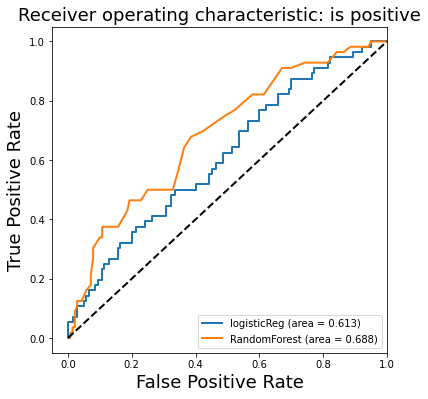

In [ ]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score,plot_precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

def print_roc(y_validation,yhat_lr,yhat_rf):
    fpr_lr, tpr_lr, threshold = roc_curve(y_validation, yhat_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    fpr_rf, tpr_rf, threshold = roc_curve(y_validation, yhat_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(6,6))
    plt.plot(fpr_lr, tpr_lr, label='logisticReg (area = %0.3f)' % roc_auc_lr, linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = %0.3f)' % roc_auc_rf, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: is positive', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

print_roc(y_validation,yhat_lr,yhat_rf)

average precision Logistic Regression :0.418
average precision Random Forest :0.456


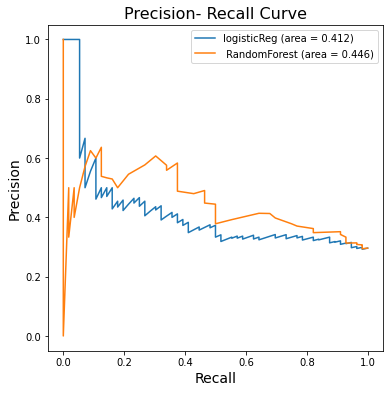

In [ ]:
def print_precision_recall_curve(y_validation,yhat_lr,yhat_rf):
    average_precision_lr = average_precision_score(y_validation, yhat_lr[:,1])
    print('average precision Logistic Regression :%0.3f' %average_precision_lr)
    average_precision_rf = average_precision_score(y_validation, yhat_rf[:,1])
    print('average precision Random Forest :%0.3f' %average_precision_rf)
    precision_lr, recall_lr, thresholds = precision_recall_curve(y_validation, yhat_lr[:,1])
    precision_rf, recall_rf, thresholds = precision_recall_curve(y_validation, yhat_rf[:,1])
    auc_precision_recall_lr = auc(recall_lr, precision_lr)
    auc_precision_recall_rf = auc(recall_rf, precision_rf)
    plt.figure(figsize=(6,6))
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision- Recall Curve', fontsize=16)
    plt.plot(recall_lr, precision_lr,label='logisticReg (area = %0.3f)' %auc_precision_recall_lr )
    plt.plot(recall_rf, precision_rf,label=' RandomForest (area = %0.3f)' %auc_precision_recall_rf )
    plt.legend(loc="upper right")
    plt.show()

print_precision_recall_curve(y_validation,yhat_lr,yhat_rf)

**Based on the above results , we see the Random forest classifier performing better when it comes to the ROC and Precision Recall Curve , while the logistic regression has a better Val accuracy.**

#Predicting Answers by implementation of TF-IDF

**Now we try to predict predict the ANSWER LABEL 2 ("Answer_2_negative": 0, "Answer_2_positive": 1) for the text.**

We start with the data pre-processing and the data cleaning. We modify the dataframe so that we get the data related to Answer label 2

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


,Unnamed: 0,text,category,stage,level
0,0,Good afternoon and thanks a lot for taking my...,Question,1,0
1,1,Good afternoon and thanks a lot for taking my ...,Question,2,0
2,2,Good afternoon and thanks a lot for taking my ...,Question,3,1
3,3,"No, I think that as it relates to the one, I t...",Answer,1,0
4,4,"No, I think that as it relates to the one, I ...",Answer,2,1
...,...,...,...,...,...
8467,8467,One of the areas obviously which has been a s...,Question,2,0
8468,8468,One of the areas obviously which has been a st...,Question,3,1
8469,8469,"Well, let's start with the first part of your ...",Answer,1,0
8470,8470,"Well, let's start with the first part of your ...",Answer,2,1


In [ ]:
index= df[df["category"]=="Question"].index
df.drop(index,inplace=True)
data= df[df["stage"]==2]
data.drop(columns=["category","stage","Unnamed: 0"],axis=1 ,inplace=True)
data.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1516, 2)

In [ ]:
data

,text,level
4,"No, I think that as it relates to the one, I ...",1
10,"Well, clearly, it surpassed all of our very hi...",1
16,"I think the last few years, not only for us bu...",1
22,"The core-on-core, well, yes, I don't think the...",0
28,"There's lots of everything, Simeon. We really ...",1
...,...,...
8443,"Great, Tom. And I think the reason why we beli...",1
8452,"Yes, I mean, as part of our prepared remarks, ...",1
8458,"I'll touch on one, maybe in a little bit of de...",1
8464,"Yes, sure. The performance of RPO, and as we g...",1


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
snowStem = nltk.stem.SnowballStemmer('english')
sw_nltk = stopwords.words('english')
sw_nltk.append('however')

def my_preprocessor(processed_data, remove_stopwords = False, stemming = False):
    # remove numbers 
    processed_data = re.sub(r'\d+', '', processed_data)
    # remove punctuation
    processed_data = processed_data.translate(str.maketrans('','', string.punctuation))
    # remove spaces
    processed_data = processed_data.strip()
    #upper to lower
    processed_data = processed_data.lower()
    
    if stemming:
      # stemming
      processed_data = snowStem.stem(processed_data)
    
    if remove_stopwords:
        # remove stop words
        processed_data = ' '.join([word for word in processed_data.split() if not(word in sw_nltk)])
        
    
    return processed_data

In [ ]:
data.loc[:, 'processed_data'] = [my_preprocessor(text, remove_stopwords = True) for text in data.text]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
corpus=[]
for text in data["text"]:
    corpus.append(my_preprocessor(text, remove_stopwords = True))

In [ ]:
target=data['level']

In [ ]:
#reorder the data

data = data[['text','processed_data','level']]
data

,text,processed_data,level
4,"No, I think that as it relates to the one, I ...",think relates one think weve got currently und...,1
10,"Well, clearly, it surpassed all of our very hi...",well clearly surpassed high expectations said ...,1
16,"I think the last few years, not only for us bu...",think last years us big gas retailers supermar...,1
22,"The core-on-core, well, yes, I don't think the...",coreoncore well yes dont think big surprises a...,0
28,"There's lots of everything, Simeon. We really ...",theres lots everything simeon really dont talk...,1
...,...,...,...
8443,"Great, Tom. And I think the reason why we beli...",great tom think reason believe midmarket oppor...,1
8452,"Yes, I mean, as part of our prepared remarks, ...",yes mean part prepared remarks talked fact ado...,1
8458,"I'll touch on one, maybe in a little bit of de...",ill touch one maybe little bit detail adobe ex...,1
8464,"Yes, sure. The performance of RPO, and as we g...",yes sure performance rpo go forward youll star...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vect = TfidfVectorizer(ngram_range = (1, 2), min_df= 2, max_features=1000) 
vectorized_text=vect.fit_transform(data['processed_data'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(vectorized_text, target, test_size=.3, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5,random_state=42)

In [ ]:
#Classification implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_reg_train_model(x_train,y_train,x_test,y_test):
    log_reg = LogisticRegression(random_state=0)
    log_reg.fit(x_train,y_train)
    pred = log_reg.predict(x_test)
    log_accuracy = accuracy_score(y_test,pred)
    print (str(log_accuracy)+(" is the accuracy of the logistic regression model"))
    return log_reg
    
def Random_forest_train_model(x_train,y_train,x_test,y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    rf_accuracy= accuracy_score(y_test,pred)
    print(str(rf_accuracy)+(" is the accuracy of the RandomForestClassifier model"))
    return rf

log_reg = logistic_reg_train_model(x_train,y_train,x_test,y_test)
rf = Random_forest_train_model(x_train,y_train,x_test,y_test)

0.868421052631579 is the accuracy of the logistic regression model
0.8728070175438597 is the accuracy of the RandomForestClassifier model


In [ ]:
#validation

def logistic_reg_val_model(x_validation,y_validation, log_reg):
    y_pred_lr = log_reg.predict(x_validation)
    yprob_lr = log_reg.predict_proba(x_validation)
    log_accuracy = accuracy_score(y_validation,y_pred_lr)
    print (str(log_accuracy)+(" is the Val_accuracy of the logistic regression model"))
    return yprob_lr

def random_forest_val_model(x_validation,y_validation, rf):
    y_pred_rf = rf.predict(x_validation)
    yprob_rf = rf.predict_proba(x_validation)
    rf_acc= accuracy_score(y_validation,y_pred_rf)
    print(str(rf_acc)+(" is the Val_accuracy of the RandomForestClassifier model"))
    return yprob_rf

yhat_lr = logistic_reg_val_model(x_validation,y_validation,log_reg)
yhat_rf = random_forest_val_model(x_validation,y_validation,rf)

0.8370044052863436 is the Val_accuracy of the logistic regression model
0.8414096916299559 is the Val_accuracy of the RandomForestClassifier model


In [ ]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score,plot_precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

def print_roc(y_validation,yhat_lr,yhat_rf):
    fpr_lr, tpr_lr, threshold = roc_curve(y_validation, yhat_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    fpr_rf, tpr_rf, threshold = roc_curve(y_validation, yhat_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(6,6))
    plt.plot(fpr_lr, tpr_lr, label='logisticReg (area = %0.3f)' % roc_auc_lr, linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = %0.3f)' % roc_auc_rf, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: is positive', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

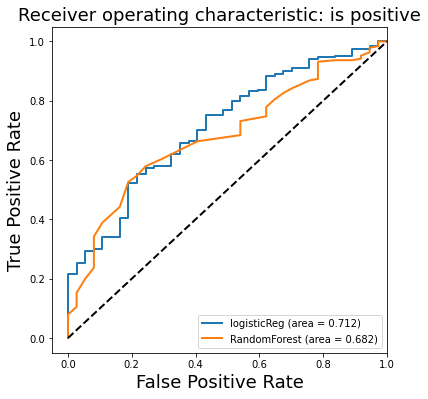

In [ ]:
print_roc(y_validation,yhat_lr,yhat_rf)

average precision Logistic Regression :0.928
average precision Random Forest :0.916


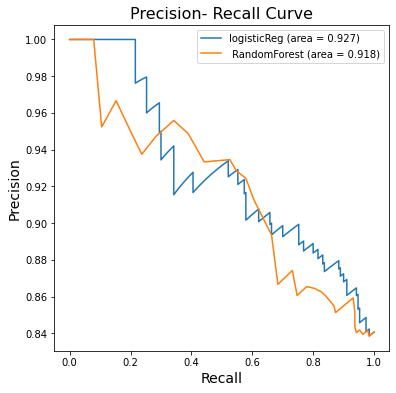

In [ ]:
def print_precision_recall_curve(y_validation,yhat_lr,yhat_rf):
    average_precision_lr = average_precision_score(y_validation, yhat_lr[:,1])
    print('average precision Logistic Regression :%0.3f' %average_precision_lr)
    average_precision_rf = average_precision_score(y_validation, yhat_rf[:,1])
    print('average precision Random Forest :%0.3f' %average_precision_rf)
    precision_lr, recall_lr, thresholds = precision_recall_curve(y_validation, yhat_lr[:,1])
    precision_rf, recall_rf, thresholds = precision_recall_curve(y_validation, yhat_rf[:,1])
    auc_precision_recall_lr = auc(recall_lr, precision_lr)
    auc_precision_recall_rf = auc(recall_rf, precision_rf)
    plt.figure(figsize=(6,6))
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision- Recall Curve', fontsize=16)
    plt.plot(recall_lr, precision_lr,label='logisticReg (area = %0.3f)' %auc_precision_recall_lr )
    plt.plot(recall_rf, precision_rf,label=' RandomForest (area = %0.3f)' %auc_precision_recall_rf )
    plt.legend(loc="upper right")
    plt.show()

print_precision_recall_curve(y_validation,yhat_lr,yhat_rf)

**Based on the above results , we see the Logistic Regression performing better when it comes to the ROC and Precision Recall Curve , while the Random forest classifier has a better Val accuracy.**

#Latent Dirichlet Allocation

**Topic modeling provides methods for automatically organizing, understanding, searching, and summarizing large electronic archives.**

**It can help with the following:**


*  **using the classification to organize/summarize/search the documents.**
*  **discovering the hidden themes in the collection.**
*  **classifying the documents into the discovered themes.**


**Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions**

**Here we use the same data cleaning and data preprocessing steps as followed in the previous model.**

**Now we try to predict predict the ANSWER LABEL 2 ("Answer_2_negative": 0, "Answer_2_positive": 1) for the text.**

**We start with the data pre-processing and the data cleaning. We modify the dataframe so that we get the data related to Answer label 2**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


In [ ]:
indexnames= df[df["category"]=="Question"].index
df.drop(indexnames,inplace=True)
data= df[df["stage"]==2]
data.drop(columns=["category","stage","Unnamed: 0"],axis=1 ,inplace=True)
print(data.shape)
data


(1516, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,text,level
4,"No, I think that as it relates to the one, I ...",1
10,"Well, clearly, it surpassed all of our very hi...",1
16,"I think the last few years, not only for us bu...",1
22,"The core-on-core, well, yes, I don't think the...",0
28,"There's lots of everything, Simeon. We really ...",1
...,...,...
8443,"Great, Tom. And I think the reason why we beli...",1
8452,"Yes, I mean, as part of our prepared remarks, ...",1
8458,"I'll touch on one, maybe in a little bit of de...",1
8464,"Yes, sure. The performance of RPO, and as we g...",1


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
snowStem = nltk.stem.SnowballStemmer('english')
sw_nltk = stopwords.words('english')
sw_nltk.append('however')

def my_preprocessor(processed_data, remove_stopwords = False, stemming = False):
    # remove numbers 
    processed_data = re.sub(r'\d+', '', processed_data)
    # remove punctuation
    processed_data = processed_data.translate(str.maketrans('','', string.punctuation))
    # remove spaces
    processed_data = processed_data.strip()
    #upper to lower
    processed_data = processed_data.lower()
    
    if stemming:
      # stemming
      processed_data = snowStem.stem(processed_data)
    
    if remove_stopwords:
        # remove stop words
        processed_data = ' '.join([word for word in processed_data.split() if not(word in sw_nltk)])
        
    
    return processed_data

In [ ]:
data.loc[:, 'processed_data'] = [my_preprocessor(text, remove_stopwords = True) for text in data.text]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
corpus=[]
for text in data["text"]:
    corpus.append(my_preprocessor(text, remove_stopwords = True))

In [ ]:
target=data['level']

#re-arranging the df .

data = data[['text','processed_data','level']]
data

,text,processed_data,level
4,"No, I think that as it relates to the one, I ...",think relates one think weve got currently und...,1
10,"Well, clearly, it surpassed all of our very hi...",well clearly surpassed high expectations said ...,1
16,"I think the last few years, not only for us bu...",think last years us big gas retailers supermar...,1
22,"The core-on-core, well, yes, I don't think the...",coreoncore well yes dont think big surprises a...,0
28,"There's lots of everything, Simeon. We really ...",theres lots everything simeon really dont talk...,1
...,...,...,...
8443,"Great, Tom. And I think the reason why we beli...",great tom think reason believe midmarket oppor...,1
8452,"Yes, I mean, as part of our prepared remarks, ...",yes mean part prepared remarks talked fact ado...,1
8458,"I'll touch on one, maybe in a little bit of de...",ill touch one maybe little bit detail adobe ex...,1
8464,"Yes, sure. The performance of RPO, and as we g...",yes sure performance rpo go forward youll star...,1


In [ ]:
text = data['processed_data']
level = data['level']


**We use the LatentDirichletAllocation methof from sklearn to perform LDA.**

In [ ]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load Dataset
documents_list= data['processed_data'].tolist()

In [ ]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(documents_list) 

In [ ]:
# Define the number of topics or components
num_components=10

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components 
lda_components=model.components_

In [ ]:
# Print the topics with their terms
terms = tfidf.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['dose', 'flex', 'worse', 'utilization', 'upside', 'fitness', 'truck']
Topic 1:  ['huawei', 'appliance', 'fiscal', 'account', 'channel', 'choose', 'likely']
Topic 2:  ['services', 'relationship', 'home', 'argentina', 'helping', 'payers', 'training']
Topic 3:  ['disclose', 'david', 'ladies', 'wouldnt', 'click', 'seasonal', 'hong']
Topic 4:  ['desktop', 'memory', 'hotels', 'telco', 'scale', 'inventory', 'comparables']
Topic 5:  ['reported', 'accelerate', 'bob', 'texas', 'postpaid', 'downturn', 'services']
Topic 6:  ['tinder', 'logic', 'foundry', 'phase', 'novaseq', 'saar', 'memory']
Topic 7:  ['think', 'going', 'year', 'really', 'thats', 'weve', 'quarter']
Topic 8:  ['inflation', 'vehicles', 'electric', 'pc', 'services', 'channel', 'inventory']
Topic 9:  ['dsd', 'medicare', 'using', 'hotels', 'airpods', 'availability', 'insulin']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(lda_matrix, target, test_size=.3, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [ ]:
#Classification implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_reg_train_model(x_train,y_train,x_test,y_test):
    log_reg = LogisticRegression(random_state=0)
    log_reg.fit(x_train,y_train)
    pred = log_reg.predict(x_test)
    log_accuracy = accuracy_score(y_test,pred)
    print (str(log_accuracy)+(" is the accuracy of the logistic regression model"))
    return log_reg
    
def Random_forest_train_model(x_train,y_train,x_test,y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    rf_accuracy= accuracy_score(y_test,pred)
    print(str(rf_accuracy)+(" is the accuracy of the RandomForestClassifier model"))
    return rf

log_reg = logistic_reg_train_model(x_train,y_train,x_test,y_test)
rf = Random_forest_train_model(x_train,y_train,x_test,y_test)

0.868421052631579 is the accuracy of the logistic regression model
0.8201754385964912 is the accuracy of the RandomForestClassifier model


In [ ]:
#validation

def logistic_reg_val_model(x_validation,y_validation, log_reg):
    y_pred_lr = log_reg.predict(x_validation)
    yprob_lr = log_reg.predict_proba(x_validation)
    log_accuracy = accuracy_score(y_validation,y_pred_lr)
    print (str(log_accuracy)+(" is the Val_accuracy of the logistic regression model"))
    return yprob_lr

def random_forest_val_model(x_validation,y_validation, rf):
    y_pred_rf = rf.predict(x_validation)
    yprob_rf = rf.predict_proba(x_validation)
    rf_acc= accuracy_score(y_validation,y_pred_rf)
    print(str(rf_acc)+(" is the Val_accuracy of the RandomForestClassifier model"))
    return yprob_rf

yhat_lr = logistic_reg_val_model(x_validation,y_validation,log_reg)
yhat_rf = random_forest_val_model(x_validation,y_validation,rf)

0.8370044052863436 is the Val_accuracy of the logistic regression model
0.7929515418502202 is the Val_accuracy of the RandomForestClassifier model


In [ ]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score,plot_precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

def print_roc(y_validation,yhat_lr,yhat_rf):
    fpr_lr, tpr_lr, threshold = roc_curve(y_validation, yhat_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    fpr_rf, tpr_rf, threshold = roc_curve(y_validation, yhat_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(6,6))
    plt.plot(fpr_lr, tpr_lr, label='logisticReg (area = %0.3f)' % roc_auc_lr, linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = %0.3f)' % roc_auc_rf, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: is positive', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

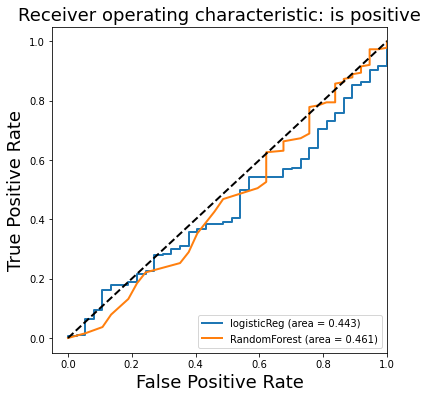

In [ ]:
print_roc(y_validation,yhat_lr,yhat_rf)

average precision Logistic Regression :0.822
average precision Random Forest :0.813


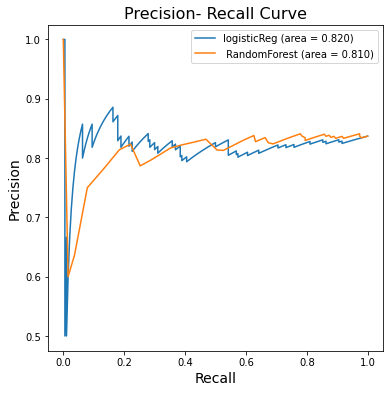

In [ ]:
def print_precision_recall_curve(y_validation,yhat_lr,yhat_rf):
    average_precision_lr = average_precision_score(y_validation, yhat_lr[:,1])
    print('average precision Logistic Regression :%0.3f' %average_precision_lr)
    average_precision_rf = average_precision_score(y_validation, yhat_rf[:,1])
    print('average precision Random Forest :%0.3f' %average_precision_rf)
    precision_lr, recall_lr, thresholds = precision_recall_curve(y_validation, yhat_lr[:,1])
    precision_rf, recall_rf, thresholds = precision_recall_curve(y_validation, yhat_rf[:,1])
    auc_precision_recall_lr = auc(recall_lr, precision_lr)
    auc_precision_recall_rf = auc(recall_rf, precision_rf)
    plt.figure(figsize=(6,6))
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision- Recall Curve', fontsize=16)
    plt.plot(recall_lr, precision_lr,label='logisticReg (area = %0.3f)' %auc_precision_recall_lr )
    plt.plot(recall_rf, precision_rf,label=' RandomForest (area = %0.3f)' %auc_precision_recall_rf )
    plt.legend(loc="upper right")
    plt.show()

print_precision_recall_curve(y_validation,yhat_lr,yhat_rf)

**Based on the above results , we see the Logistic Regresssion performing better when it comes to the Accuracy and Precision Recall Curve , while the logistic regression has a better AUC.**

#GloVe

**GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.**

**We import all the necessary libraries.**

In [ ]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D , GRU
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

**Here we use the same data cleaning and data preprocessing steps as followed in the previous model.**

**Now we try to predict predict the ANSWER LABEL 2 ("Answer_2_negative": 0, "Answer_2_positive": 1) for the text.**

**We start with the data pre-processing and the data cleaning. We modify the dataframe so that we get the data related to Answer label 2**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


In [ ]:
indexnames= df[df["category"]=="Question"].index
df.drop(indexnames,inplace=True)
data= df[df["stage"]==2]
data.drop(columns=["category","stage","Unnamed: 0"],axis=1 ,inplace=True)
print(data.shape)
data


(1516, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,text,level
4,"No, I think that as it relates to the one, I ...",1
10,"Well, clearly, it surpassed all of our very hi...",1
16,"I think the last few years, not only for us bu...",1
22,"The core-on-core, well, yes, I don't think the...",0
28,"There's lots of everything, Simeon. We really ...",1
...,...,...
8443,"Great, Tom. And I think the reason why we beli...",1
8452,"Yes, I mean, as part of our prepared remarks, ...",1
8458,"I'll touch on one, maybe in a little bit of de...",1
8464,"Yes, sure. The performance of RPO, and as we g...",1


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
snowStem = nltk.stem.SnowballStemmer('english')
sw_nltk = stopwords.words('english')
sw_nltk.append('however')

def my_preprocessor(processed_data, remove_stopwords = False, stemming = False):
    # remove numbers 
    processed_data = re.sub(r'\d+', '', processed_data)
    # remove punctuation
    processed_data = processed_data.translate(str.maketrans('','', string.punctuation))
    # remove spaces
    processed_data = processed_data.strip()
    #upper to lower
    processed_data = processed_data.lower()
    
    if stemming:
      # stemming
      processed_data = snowStem.stem(processed_data)
    
    if remove_stopwords:
        # remove stop words
        processed_data = ' '.join([word for word in processed_data.split() if not(word in sw_nltk)])
        
    
    return processed_data

In [ ]:
data.loc[:, 'processed_data'] = [my_preprocessor(text, remove_stopwords = True) for text in data.text]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
corpus=[]
for text in data["text"]:
    corpus.append(my_preprocessor(text, remove_stopwords = True))

In [ ]:
target=data['level']

#re-arranging the df .

data = data[['text','processed_data','level']]
data

,text,processed_data,level
4,"No, I think that as it relates to the one, I ...",think relates one think weve got currently und...,1
10,"Well, clearly, it surpassed all of our very hi...",well clearly surpassed high expectations said ...,1
16,"I think the last few years, not only for us bu...",think last years us big gas retailers supermar...,1
22,"The core-on-core, well, yes, I don't think the...",coreoncore well yes dont think big surprises a...,0
28,"There's lots of everything, Simeon. We really ...",theres lots everything simeon really dont talk...,1
...,...,...,...
8443,"Great, Tom. And I think the reason why we beli...",great tom think reason believe midmarket oppor...,1
8452,"Yes, I mean, as part of our prepared remarks, ...",yes mean part prepared remarks talked fact ado...,1
8458,"I'll touch on one, maybe in a little bit of de...",ill touch one maybe little bit detail adobe ex...,1
8464,"Yes, sure. The performance of RPO, and as we g...",yes sure performance rpo go forward youll star...,1


In [ ]:
text = data['processed_data']
level = data['level']


In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(text, level, test_size=0.2, random_state = 42)

**Now we will tokenize all the words in the train set, so the Tokenizer basically indexes all the words in the text and each word gets a unique index. This helps in creating dictionary mapping words to an index which will be very necessary to us later.**

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

**Now we will write a function to read the contents of the GloVe Vector file, which returns us a dictionary that maps the words to their respective word embeddings.**

In [ ]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

**We define maxLen which is the maximum length of one review we will use for our training, I have kept the value to be 150, we will pad this later so all the inputs have the same.**

In [ ]:
word_to_vec_map = read_glove_vector('/content/drive/My Drive/glove.6B.50d.txt')

maxLen = 150

**We defined the embedding matrix here, where all the words which are not in the GloVe dictionary being assigned a zero vector.**

In [ ]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['apple'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

words_to_index.items()

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index - 1, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)

**We also defined the embedding layer using the built-in Keras Embedding layer. The embedding layer maps the words to their embedding vectors from the embedding matrix. We can keep this layer as trainable, which will learn the word embedding itself but as we are using GloVe Embeddings, we won’t keep the layer as trainable.**
**We will use this layer to define our model architecture.**

**We define two models , one using Convolutions and the other one using LSTM.**

In [ ]:
def conv1d_model(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Conv1D(512,3,activation='relu')(embeddings)
  
  X = MaxPooling1D(3)(X)

  X = Conv1D(256,3,activation='relu')(X)
  
  X = MaxPooling1D(3)(X)

  X = Conv1D(256,3,activation='relu')(X)
  X = Dropout(0.8)(X)
  X = MaxPooling1D(3)(X)

  X = GlobalMaxPooling1D()(X)

  X = Dense(256, activation='relu')(X)
  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model
                

In [ ]:
model_1d = conv1d_model((maxLen,))
model_1d.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           456550    
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          77312     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 256)          0         
 1D)                                                       

**We pad the sequences so that all data is of the same length.**

In [ ]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(1212, 150)

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)
model_1d.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_1d.fit(X_train_indices, Y_train, batch_size=64, epochs=10)

Epoch 1/10
19/19 [==============================] - 13s 549ms/step - loss: 13.1240 - accuracy: 0.7814
Epoch 2/10
19/19 [==============================] - 6s 317ms/step - loss: 0.4751 - accuracy: 0.8218
Epoch 3/10
19/19 [==============================] - 6s 317ms/step - loss: 0.4785 - accuracy: 0.8193
Epoch 4/10
19/19 [==============================] - 6s 313ms/step - loss: 0.4585 - accuracy: 0.8226
Epoch 5/10
19/19 [==============================] - 6s 315ms/step - loss: 0.4313 - accuracy: 0.8243
Epoch 6/10
19/19 [==============================] - 6s 314ms/step - loss: 0.4099 - accuracy: 0.8300
Epoch 7/10
19/19 [==============================] - 6s 313ms/step - loss: 0.3616 - accuracy: 0.8465
Epoch 8/10
19/19 [==============================] - 6s 317ms/step - loss: 0.3198 - accuracy: 0.8738
Epoch 9/10
19/19 [==============================] - 6s 316ms/step - loss: 0.2483 - accuracy: 0.8960
Epoch 10/10
19/19 [==============================] - 6s 316ms/step - loss: 0.2109 - accuracy: 0.91

**The Convolution neural network performed extremely well with a accuracy of 91%.**


In [ ]:
#definition of LSTM model:

def lstm(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.5)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.5)(X)

  X = LSTM(128)(X)

  X = Dense(128, activation='relu')(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model_lstm = lstm((maxLen,))
model_lstm.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           456550    
                                                                 
 gru_8 (GRU)                 (None, 150, 128)          69120     
                                                                 
 dropout_19 (Dropout)        (None, 150, 128)          0         
                                                                 
 gru_9 (GRU)                 (None, 150, 128)          99072     
                                                                 
 dropout_20 (Dropout)        (None, 150, 128)          0         
                                                                 
 lstm_15 (LSTM)              (None, 128)               131

**Padding to make sentences of equal length.**

In [ ]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(1212, 150)

**A bunch of hyperparamter tuning was done with the LSTM model but the accuracy doesnt seem to improve after it reaches 82.26**

In [ ]:
adam = tf.keras.optimizers.SGD(learning_rate = 0.0001)
model_lstm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_indices, Y_train, batch_size=64, epochs=40)

Epoch 1/40
19/19 [==============================] - 8s 302ms/step - loss: 0.6238 - accuracy: 0.7422
Epoch 2/40
19/19 [==============================] - 6s 302ms/step - loss: 0.6218 - accuracy: 0.7478
Epoch 3/40
19/19 [==============================] - 6s 303ms/step - loss: 0.6192 - accuracy: 0.7529
Epoch 4/40
19/19 [==============================] - 6s 304ms/step - loss: 0.6171 - accuracy: 0.7562
Epoch 5/40
19/19 [==============================] - 6s 301ms/step - loss: 0.6149 - accuracy: 0.7615
Epoch 6/40
19/19 [==============================] - 6s 303ms/step - loss: 0.6129 - accuracy: 0.7654
Epoch 7/40
19/19 [==============================] - 6s 302ms/step - loss: 0.6106 - accuracy: 0.7695
Epoch 8/40
19/19 [==============================] - 6s 302ms/step - loss: 0.6087 - accuracy: 0.7722
Epoch 9/40
19/19 [==============================] - 6s 303ms/step - loss: 0.6068 - accuracy: 0.7750
Epoch 10/40
19/19 [==============================] - 6s 306ms/step - loss: 0.6051 - accuracy: 0.7788

In [ ]:
adam = tf.keras.optimizers.SGD(learning_rate = 0.0001)
model_lstm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_indices, Y_train, batch_size=64, epochs=50)

Epoch 1/50
19/19 [==============================] - 51s 305ms/step - loss: 0.7380 - accuracy: 0.3578
Epoch 2/50
19/19 [==============================] - 6s 306ms/step - loss: 0.7345 - accuracy: 0.3678
Epoch 3/50
19/19 [==============================] - 6s 305ms/step - loss: 0.7309 - accuracy: 0.3799
Epoch 4/50
19/19 [==============================] - 6s 304ms/step - loss: 0.7278 - accuracy: 0.3889
Epoch 5/50
19/19 [==============================] - 6s 304ms/step - loss: 0.7250 - accuracy: 0.3992
Epoch 6/50
19/19 [==============================] - 6s 305ms/step - loss: 0.7215 - accuracy: 0.4113
Epoch 7/50
19/19 [==============================] - 6s 302ms/step - loss: 0.7187 - accuracy: 0.4208
Epoch 8/50
19/19 [==============================] - 6s 303ms/step - loss: 0.7160 - accuracy: 0.4308
Epoch 9/50
19/19 [==============================] - 6s 301ms/step - loss: 0.7131 - accuracy: 0.4417
Epoch 10/50
19/19 [==============================] - 6s 304ms/step - loss: 0.7100 - accuracy: 0.453

In [ ]:
adam = tf.keras.optimizers.SGD(learning_rate = 0.01)
model_lstm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_indices, Y_train, batch_size=64, epochs=10)

Epoch 1/10
19/19 [==============================] - 22s 884ms/step - loss: 0.5843 - accuracy: 0.8045
Epoch 2/10
19/19 [==============================] - 17s 879ms/step - loss: 0.4986 - accuracy: 0.8226
Epoch 3/10
19/19 [==============================] - 17s 882ms/step - loss: 0.4789 - accuracy: 0.8226
Epoch 4/10
19/19 [==============================] - 17s 880ms/step - loss: 0.4763 - accuracy: 0.8226
Epoch 5/10
19/19 [==============================] - 17s 882ms/step - loss: 0.4733 - accuracy: 0.8226
Epoch 6/10
19/19 [==============================] - 17s 876ms/step - loss: 0.4742 - accuracy: 0.8226
Epoch 7/10
19/19 [==============================] - 17s 878ms/step - loss: 0.4726 - accuracy: 0.8226
Epoch 8/10
19/19 [==============================] - 17s 875ms/step - loss: 0.4712 - accuracy: 0.8226
Epoch 9/10
19/19 [==============================] - 17s 876ms/step - loss: 0.4727 - accuracy: 0.8226
Epoch 10/10
19/19 [==============================] - 17s 874ms/step - loss: 0.4713 - accura

In [ ]:
adam = tf.keras.optimizers.SGD(learning_rate = 0.0001)
model_lstm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_indices, Y_train, batch_size=64, epochs=100)

Epoch 1/100
19/19 [==============================] - 22s 873ms/step - loss: 0.7223 - accuracy: 0.2682
Epoch 2/100
19/19 [==============================] - 17s 868ms/step - loss: 0.7172 - accuracy: 0.3069
Epoch 3/100
19/19 [==============================] - 17s 872ms/step - loss: 0.7122 - accuracy: 0.3292
Epoch 4/100
19/19 [==============================] - 17s 870ms/step - loss: 0.7099 - accuracy: 0.3564
Epoch 5/100
19/19 [==============================] - 17s 875ms/step - loss: 0.7042 - accuracy: 0.4051
Epoch 6/100
19/19 [==============================] - 17s 871ms/step - loss: 0.7015 - accuracy: 0.4323
Epoch 7/100
19/19 [==============================] - 17s 873ms/step - loss: 0.6996 - accuracy: 0.4464
Epoch 8/100
19/19 [==============================] - 17s 873ms/step - loss: 0.6947 - accuracy: 0.4851
Epoch 9/100
19/19 [==============================] - 17s 874ms/step - loss: 0.6905 - accuracy: 0.5206
Epoch 10/100
19/19 [==============================] - 17s 869ms/step - loss: 0.685

**On the whole , while using a RNN with GloVe , the learning seemed to stop after a particular point. Slow learning rate with higher epochs didnt show any improvement on accuracy. While using Conv net the accuracy was far better.**

**GloVe with Logistic Regression and Random Forest**



**Now we try to predict predict the ANSWER LABEL 2 ("Answer_2_negative": 0, "Answer_2_positive": 1) for the text.**

**We start with the data pre-processing and the data cleaning. We modify the dataframe so that we get the data related to Answer label 2**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/data.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


,Unnamed: 0,text,category,stage,level
0,0,Good afternoon and thanks a lot for taking my...,Question,1,0
1,1,Good afternoon and thanks a lot for taking my ...,Question,2,0
2,2,Good afternoon and thanks a lot for taking my ...,Question,3,1
3,3,"No, I think that as it relates to the one, I t...",Answer,1,0
4,4,"No, I think that as it relates to the one, I ...",Answer,2,1
...,...,...,...,...,...
8467,8467,One of the areas obviously which has been a s...,Question,2,0
8468,8468,One of the areas obviously which has been a st...,Question,3,1
8469,8469,"Well, let's start with the first part of your ...",Answer,1,0
8470,8470,"Well, let's start with the first part of your ...",Answer,2,1


**We remove the stopwords.**

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

In [ ]:
def remove_stopwords(data):
  data['text without stopwords'] = data['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
    
data_without_stopwords = remove_stopwords(data)
data_without_stopwords['clean_text']= data_without_stopwords['text without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['clean_text'] = data_without_stopwords['clean_text'].str.replace('[{}]'.format(string.punctuation), ' ')
data_without_stopwords

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,text,category,stage,level,text without stopwords,clean_text
0,0,Good afternoon and thanks a lot for taking my...,Question,1,0,"Good afternoon thanks lot taking question. So,...",Good afternoon thanks lot taking question So ...
1,1,Good afternoon and thanks a lot for taking my ...,Question,2,0,"Good afternoon thanks lot taking question. So,...",Good afternoon thanks lot taking question So ...
2,2,Good afternoon and thanks a lot for taking my ...,Question,3,1,"Good afternoon thanks lot taking question. So,...",Good afternoon thanks lot taking question So ...
3,3,"No, I think that as it relates to the one, I t...",Answer,1,0,"No, I think relates one, I think got currently...",No I think relates one I think got currently...
4,4,"No, I think that as it relates to the one, I ...",Answer,2,1,"No, I think relates one, I think got currently...",No I think relates one I think got currently...
...,...,...,...,...,...,...,...
8467,8467,One of the areas obviously which has been a s...,Question,2,0,One areas obviously strong growth driver team ...,One areas obviously strong growth driver team ...
8468,8468,One of the areas obviously which has been a st...,Question,3,1,One areas obviously strong growth driver team ...,One areas obviously strong growth driver team ...
8469,8469,"Well, let's start with the first part of your ...",Answer,1,0,"Well, start first part question, see 2020 busi...",Well start first part question see 2020 busi...
8470,8470,"Well, let's start with the first part of your ...",Answer,2,1,"Well, start first part question, see 2020 busi...",Well start first part question see 2020 busi...


In [ ]:
indexnames= data[data["category"]=="Question"].index
data.drop(indexnames,inplace=True)
data1= data[data["stage"]==2]
data1.drop(columns=["category","text","text without stopwords","stage","Unnamed: 0"],axis=1 ,inplace=True)
text = data1['clean_text']
level = data1['level']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(text, level, test_size=0.2, random_state = 42)


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#import all neccessary packages
import tqdm
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import punkt
stop_words = stopwords.words('english')


train_text = X_train
test_text = X_test
all_text = pd.concat([X_train, X_test])

print("Checkpoint1 - Data Read Complete")

embeddings_index = {}
f = open('/content/drive/My Drive/glove.6B.50d.txt', encoding="utf8")
for line in tqdm.tqdm(f):
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()
print('Found %s word vectors.' % len(embeddings_index))

# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm.tqdm(train_text)]
xtest_glove = [sent2vec(x) for x in tqdm.tqdm(test_text)]

print('Checkpoint2 -Normalized Vector for Sentences are created')

xtrain_glove = np.array(xtrain_glove)
xtest_glove = np.array(xtest_glove)

xtrain_glove

Checkpoint1 - Data Read Complete


400000it [00:06, 57906.75it/s]


Found 400000 word vectors.


100%|██████████| 304/304 [00:00<00:00, 914.11it/s]

Checkpoint2 -Normalized Vector for Sentences are created


array([[ 0.10007228,  0.05623661,  0.05218392, ...,  0.07784808,
        -0.01652519,  0.0656854 ],
       [ 0.08080824,  0.04778713,  0.07457291, ...,  0.03339692,
         0.02486046,  0.01131673],
       [ 0.04617532,  0.0173521 ,  0.06703743, ...,  0.05579339,
        -0.00744077, -0.02610585],
       ...,
       [ 0.07089423,  0.02691155,  0.07440811, ...,  0.07479671,
        -0.01549948,  0.04213074],
       [-0.00283932, -0.03645952,  0.05564308, ...,  0.11125776,
         0.05749149,  0.11554938],
       [ 0.02737017, -0.04118044,  0.06206383, ...,  0.03141997,
        -0.02268541,  0.09052184]], dtype=float32)

In [ ]:
x_validation, xtest, y_validation, ytest = train_test_split(xtest_glove, Y_test, test_size=.5, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score,plot_precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt

def logistic_reg_train_model(xtrain_glove,Y_train,xtest_glove,Y_test):
    log_reg = LogisticRegression(random_state=0)
    log_reg.fit(xtrain_glove,Y_train)
    y_pred = log_reg.predict(xtest_glove)
    log_accuracy = accuracy_score(Y_test,y_pred)
    print (str(log_accuracy)+(" is the accuracy of the logistic regression model"))
    return log_reg

def Random_forest_train_model(xtrain_glove,Y_train,xtest_glove,Y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(xtrain_glove,Y_train)
    y_pred = rf.predict(xtest_glove)
    rf_acc= accuracy_score(Y_test,y_pred)
    print(str(rf_acc)+(" is the accuracy of the RandomForestClassifier model"))
    return rf


In [ ]:
log_reg = logistic_reg_train_model(xtrain_glove,Y_train,xtest_glove,Y_test)
rf = Random_forest_train_model(xtrain_glove,Y_train,xtest_glove,Y_test)

0.8717105263157895 is the accuracy of the logistic regression model
0.868421052631579 is the accuracy of the RandomForestClassifier model


In [ ]:
#validation

def logistic_reg_val_model(x_validation,y_validation,  log_reg):
    y_pred_lr = log_reg.predict(x_validation)
    yprob_lr = log_reg.predict_proba(x_validation)
    log_accuracy = accuracy_score(y_validation,y_pred_lr)
    print (str(log_accuracy)+(" is the Val_accuracy of the logistic regression model"))
    return yprob_lr

def random_forest_val_model(x_validation,y_validation, rf):
    y_pred_rf = rf.predict(x_validation)
    yprob_rf = rf.predict_proba(x_validation)
    rf_acc= accuracy_score(y_validation,y_pred_rf)
    print(str(rf_acc)+(" is the Val_accuracy of the RandomForestClassifier model"))
    return yprob_rf

In [ ]:
yhat_lr = logistic_reg_val_model(x_validation,y_validation,log_reg)
yhat_rf = random_forest_val_model(x_validation,y_validation,rf)

0.881578947368421 is the Val_accuracy of the logistic regression model
0.868421052631579 is the Val_accuracy of the RandomForestClassifier model


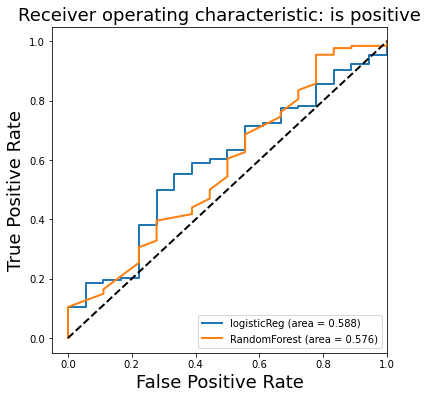

In [ ]:
def print_roc(y_validation,yhat_lr,yhat_rf):
    fpr_lr, tpr_lr, threshold = roc_curve(y_validation, yhat_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    fpr_rf, tpr_rf, threshold = roc_curve(y_validation, yhat_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(6,6))
    plt.plot(fpr_lr, tpr_lr, label='logisticReg (area = %0.3f)' % roc_auc_lr, linewidth=2)
    plt.plot(fpr_rf, tpr_rf, label='RandomForest (area = %0.3f)' % roc_auc_rf, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic: is positive', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

print_roc(y_validation,yhat_lr,yhat_rf)

average precision Logistic Regression :0.917
average precision Random Forest :0.909


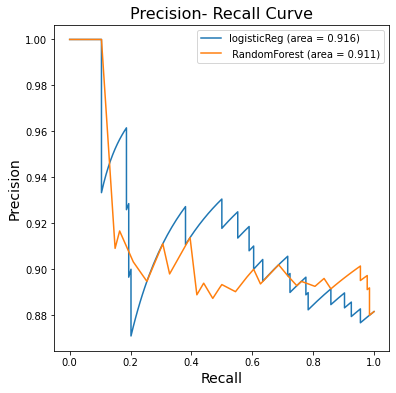

In [ ]:
def print_precision_recall_curve(y_validation,yhat_lr,yhat_rf):
    average_precision_lr = average_precision_score(y_validation, yhat_lr[:,1])
    print('average precision Logistic Regression :%0.3f' %average_precision_lr)
    average_precision_rf = average_precision_score(y_validation, yhat_rf[:,1])
    print('average precision Random Forest :%0.3f' %average_precision_rf)
    precision_lr, recall_lr, thresholds = precision_recall_curve(y_validation, yhat_lr[:,1])
    precision_rf, recall_rf, thresholds = precision_recall_curve(y_validation, yhat_rf[:,1])
    auc_precision_recall_lr = auc(recall_lr, precision_lr)
    auc_precision_recall_rf = auc(recall_rf, precision_rf)
    plt.figure(figsize=(6,6))
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision- Recall Curve', fontsize=16)
    plt.plot(recall_lr, precision_lr,label='logisticReg (area = %0.3f)' %auc_precision_recall_lr )
    plt.plot(recall_rf, precision_rf,label=' RandomForest (area = %0.3f)' %auc_precision_recall_rf )
    plt.legend(loc="upper right")
    plt.show()

print_precision_recall_curve(y_validation,yhat_lr,yhat_rf)

**Based on the above results , we see the Logistic Regression performing better when it comes to the ROC , Precision Recall Curve and in terms of accuracy.**

#Doc2vec

**Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method. Doc2Vec model, as opposite to Word2Vec model, is used to create a vectorised representation of a group of words taken collectively as a single unit. It doesn’t only give the simple average of the words in the sentence.**

**Here we use gensim.models to implement doc2vec for our data.**

In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/My Drive/data.csv')
df.info()

index= df[df["category"]=="Question"].index
df.drop(index,inplace=True)
data= df[df["stage"]==2]
data.drop(columns=["category","stage","Unnamed: 0"],axis=1 ,inplace=True)
data.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8472 non-null   int64 
 1   text        8472 non-null   object
 2   category    8472 non-null   object
 3   stage       8472 non-null   int64 
 4   level       8472 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 331.1+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1516, 2)

**Here we use the same data cleaning and data preprocessing steps as followed in the previous model.**

**Now we try to predict predict the ANSWER LABEL 2 ("Answer_2_negative": 0, "Answer_2_positive": 1) for the text.**

**We start with the data pre-processing and the data cleaning. We modify the dataframe so that we get the data related to Answer label 2**

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
snowStem = nltk.stem.SnowballStemmer('english')
sw_nltk = stopwords.words('english')
sw_nltk.append('however')

def my_preprocessor(processed_data, remove_stopwords = False, stemming = False):
    # remove numbers 
    processed_data = re.sub(r'\d+', '', processed_data)
    # remove punctuation
    processed_data = processed_data.translate(str.maketrans('','', string.punctuation))
    # remove spaces
    processed_data = processed_data.strip()
    #upper to lower
    processed_data = processed_data.lower()
    
    if stemming:
      # stemming
      processed_data = snowStem.stem(processed_data)
    
    if remove_stopwords:
        # remove stop words
        processed_data = ' '.join([word for word in processed_data.split() if not(word in sw_nltk)])
        
    
    return processed_data

In [ ]:
data.loc[:, 'processed_data'] = [my_preprocessor(text, remove_stopwords = True) for text in data.text]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
corpus=[]
for text in data["text"]:
    corpus.append(my_preprocessor(text, remove_stopwords = True))

In [ ]:
target=data['level']

In [ ]:
#re-arranging

data = data[['processed_data','level']]
data

,processed_data,level
4,think relates one think weve got currently und...,1
10,well clearly surpassed high expectations said ...,1
16,think last years us big gas retailers supermar...,1
22,coreoncore well yes dont think big surprises a...,0
28,theres lots everything simeon really dont talk...,1
...,...,...
8443,great tom think reason believe midmarket oppor...,1
8452,yes mean part prepared remarks talked fact ado...,1
8458,ill touch one maybe little bit detail adobe ex...,1
8464,yes sure performance rpo go forward youll star...,1


**Below, we define a function to label each complaint narrative. And the TaggedDocument is an object-type to encapsulate a text-example function that helps to associate a tag/number with each document of the training corpus. In our case, the tag is simply the zero based line number.**

In [ ]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.processed_data, target, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:
len(all_data)

1516

**We'll instantiate a Doc2Vec model-Distributed Bag of Words (DBOW). In the Word2Vec architecture, the two algorithm names are “continuous bag of words” (cbow) and “skip-gram” (sg); in the Doc2Vec architecture, the corresponding algorithms are “distributed bag of words” (dbow) and “distributed memory” (dm).**

**DBOW is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.**

**Training a Doc2Vec model is rather straight forward in Gensim, we initialize the model and train for 30 epochs:**

**dm =0 means ‘distributed bag of words’ (DBOW), set min_count=1 means ignoring all words with total frequency lower than this, size=300 is dimensionality of the generated feature vectors, alpha=0.065 is the initial alpha rate, learning rate will linearly drop to min_alpha as training progresses. And then we build a vocabulary.**

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 1516/1516 [00:00<00:00, 1774648.30it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1516/1516 [00:00<00:00, 1918697.91it/s]


CPU times: user 13.5 s, sys: 463 ms, total: 13.9 s
Wall time: 8.74 s


**Define a function to get the vectors.**

In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
#Perfrom logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
log_acc= accuracy_score(y_test,y_pred)
print (str(log_acc)+(" is the accuracy of the logistic regression model"))

0.7736263736263737 is the accuracy of the logistic regression model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_vectors_dbow, y_train)
y_pred = rf.predict(test_vectors_dbow)
log_acc= accuracy_score(y_test,y_pred)
print (str(log_acc)+(" is the accuracy of the random forest model"))

0.8175824175824176 is the accuracy of the random forest model


**Distributed Memory**
**Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document.** 

**We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.**

In [ ]:
model_dm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dm.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 1516/1516 [00:00<00:00, 489723.11it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

100%|██████████| 1516/1516 [00:00<00:00, 1290031.42it/s]


CPU times: user 23.8 s, sys: 1.27 s, total: 25.1 s
Wall time: 15.3 s


In [ ]:
train_vectors_dm = get_vectors(model_dm, len(X_train), 300, 'Train')
test_vectors_dm = get_vectors(model_dm, len(X_test), 300, 'Test')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score,plot_precision_recall_curve, accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dm, y_train)
y_pred = logreg.predict(test_vectors_dm)
log_acc= accuracy_score(y_test,y_pred)
print (str(log_acc)+(" is the accuracy of the logistic regression model"))

0.7670329670329671 is the accuracy of the logistic regression model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_vectors_dm, y_train)
y_pred = rf.predict(test_vectors_dm)
rf_acc= accuracy_score(y_test,y_pred)
print (str(rf_acc)+(" is the accuracy of the random forest model"))

0.8175824175824176 is the accuracy of the random forest model


**In both variations of Doc2Vec, the random forest classiffier seems to be giving better accuracy.**